In [1]:
import matplotlib.pyplot as mp
import seaborn as sb
import pandas as pd

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [3]:
from categorizer.categorizer import Categorizer
from categorizer.preprocessor import Preprocessor
from training.model_trainer import CategorizerTrainer

c:\Users\stpik\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
trainer = CategorizerTrainer("../statement_40878884_GBP_2025-01-01_2026-02-14.csv")
trainer.train()

Batches: 100%|██████████| 19/19 [00:00<00:00, 93.12it/s]

Detected 1 rare categories. Adjusting data for training...
[0]	validation_0-mlogloss:1.44245	validation_1-mlogloss:1.44345


[50]	validation_0-mlogloss:0.30322	validation_1-mlogloss:0.35647
[100]	validation_0-mlogloss:0.08629	validation_1-mlogloss:0.16047
[150]	validation_0-mlogloss:0.03229	validation_1-mlogloss:0.10694
[200]	validation_0-mlogloss:0.01759	validation_1-mlogloss:0.08905
[250]	validation_0-mlogloss:0.01207	validation_1-mlogloss:0.08018
[299]	validation_0-mlogloss:0.00937	validation_1-mlogloss:0.07535
                         precision    recall  f1-score   support

      Bills & Utilities       0.75      1.00      0.86         3
          Entertainment       1.00      1.00      1.00         1
          Food & Dining       0.95      1.00      0.98        21
                  Other       1.00      0.97      0.98        29
               Shopping       1.00      0.50      0.67         2
Transfers & Investments       1.00      1.00      1.00        45
         Transportation       1.00      1.00      1.00        16
                 Travel       0.00      0.00      0.00         0

               acc

In [5]:
preprocessor = Preprocessor("../statement_40878884_GBP_2025-01-01_2026-02-14.csv")

clean_df, label_enc, _ = preprocessor.preprocess()

classifier = Categorizer(model_file_path="../saved_model/xgb_model.json", label_enc_path="../saved_label_enc/label_encoder.joblib")

classified_data = classifier.categorize_data(clean_df)
classified_data

,Date,Amount,Currency,Description,Payment Reference,Target Name,Transaction Type,Transaction Details Type,Category
0,25-01-2026,-5.00,GBP,Lebara Mobile Limited London Lebara Mobile Lim...,NaN,Lebara Mobile Limited London,DEBIT,CARD,Bills & Utilities
1,25-01-2026,1.00,GBP,Received money from MISHRA A with reference TR...,TRANSFER,NaN,CREDIT,DEPOSIT,Transfers & Investments
2,24-01-2026,-5.00,GBP,Lebara Mobile Limited London Lebara Mobile Lim...,NaN,Lebara Mobile Limited London,DEBIT,CARD,Bills & Utilities
3,13-01-2026,-2.00,GBP,Beenetwork.com/charges 0161 244 1000 Beenetwor...,NaN,Beenetwork.com/charges 0161 244 1000,DEBIT,CARD,Other
4,13-01-2026,6.01,GBP,Received money from Madhavan Citalamangalam Ku...,Splitwise 144,NaN,CREDIT,DEPOSIT,Transfers & Investments
...,...,...,...,...,...,...,...,...,...
577,02-01-2025,-3.98,GBP,New Zealand Wines M'STER M14 New Zealand Wines...,NaN,New Zealand Wines M'STER M14,DEBIT,CARD,Other
578,01-01-2025,2.00,GBP,Stagecoach BUS TICKET Stagecoach BUS TICKET,NaN,Stagecoach BUS TICKET,CREDIT,CARD,Income
579,01-01-2025,-3.75,GBP,O'neill's Printworks MANCHESTER O'neill's Prin...,NaN,O'neill's Printworks MANCHESTER,DEBIT,CARD,Other
580,01-01-2025,-5.00,GBP,Stagecoach BUS TICKET Stagecoach BUS TICKET,NaN,Stagecoach BUS TICKET,DEBIT,CARD,Transportation


In [6]:
classified_data['Date'] = pd.to_datetime(classified_data['Date'], dayfirst=True)

In [7]:
classified_data.to_csv("test.csv")

In [8]:
income_df = classified_data[classified_data['Amount'] > 0].copy()
expense_df = classified_data[classified_data['Amount'] < 0].copy()
expense_df['Amount'] = expense_df['Amount'].abs()

C:\Users\stpik\AppData\Local\Temp\ipykernel_25444\2995915851.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_spend = expense_df['Amount'].resample('M').sum()


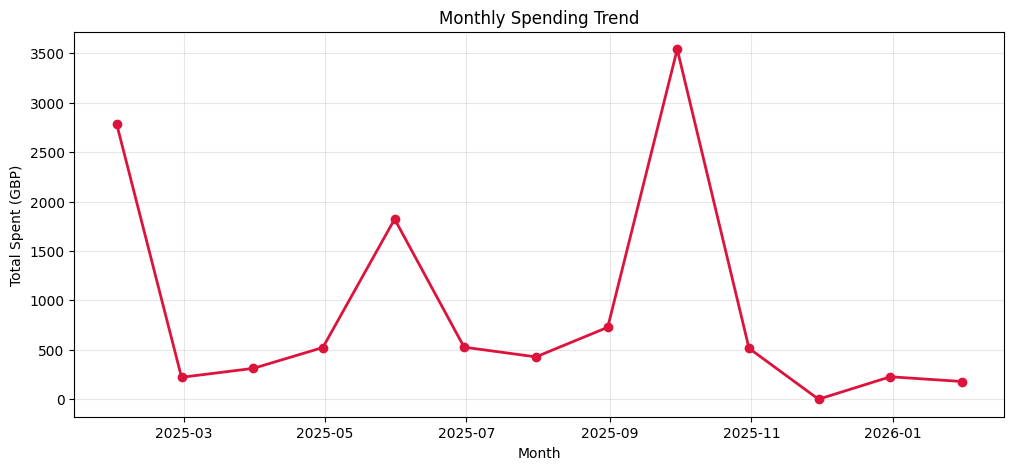

In [9]:
expense_df.set_index('Date', inplace=True)

monthly_spend = expense_df['Amount'].resample('M').sum()

mp.figure(figsize=(12, 5))
mp.plot(monthly_spend.index, monthly_spend.values, marker='o', linestyle='-', color='crimson', linewidth=2)
mp.title('Monthly Spending Trend')
mp.ylabel('Total Spent (GBP)')
mp.xlabel('Month')
mp.grid(True, alpha=0.3)
mp.show()

expense_df.reset_index(inplace=True)

Category
Transfers & Investments    6724.99
Other                      3834.98
Food & Dining               533.68
Transportation              355.58
Bills & Utilities           193.00
Entertainment                80.41
Shopping                     49.84
Travel                       35.00
Name: Amount, dtype: float64


C:\Users\stpik\AppData\Local\Temp\ipykernel_25444\1259998126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=category_spend.values, y=category_spend.index, palette='viridis')


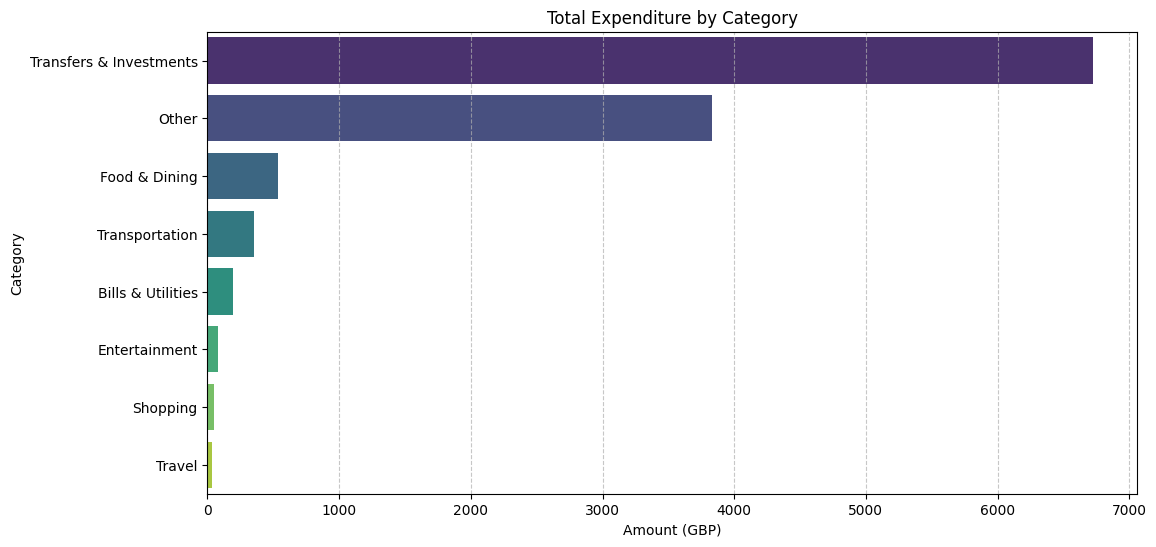

In [10]:
category_spend = expense_df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

print(category_spend)

mp.figure(figsize=(12, 6))
sb.barplot(x=category_spend.values, y=category_spend.index, palette='viridis')
mp.title('Total Expenditure by Category')
mp.xlabel('Amount (GBP)')
mp.ylabel('Category')
mp.grid(axis='x', linestyle='--', alpha=0.7)
mp.show()

In [11]:
classified_data.head(20)

,Date,Amount,Currency,Description,Payment Reference,Target Name,Transaction Type,Transaction Details Type,Category
0,2026-01-25,-5.00,GBP,Lebara Mobile Limited London Lebara Mobile Lim...,NaN,Lebara Mobile Limited London,DEBIT,CARD,Bills & Utilities
1,2026-01-25,1.00,GBP,Received money from MISHRA A with reference TR...,TRANSFER,NaN,CREDIT,DEPOSIT,Transfers & Investments
2,2026-01-24,-5.00,GBP,Lebara Mobile Limited London Lebara Mobile Lim...,NaN,Lebara Mobile Limited London,DEBIT,CARD,Bills & Utilities
3,2026-01-13,-2.00,GBP,Beenetwork.com/charges 0161 244 1000 Beenetwor...,NaN,Beenetwork.com/charges 0161 244 1000,DEBIT,CARD,Other
4,2026-01-13,6.01,GBP,Received money from Madhavan Citalamangalam Ku...,Splitwise 144,NaN,CREDIT,DEPOSIT,Transfers & Investments
5,2026-01-12,-7.30,GBP,Pret A Manger MANCHESTER Pret A Manger MANCHESTER,NaN,Pret A Manger MANCHESTER,DEBIT,CARD,Food & Dining
6,2026-01-12,-4.00,GBP,Beenetwork.com/charges 0161 244 1000 Beenetwor...,NaN,Beenetwork.com/charges 0161 244 1000,DEBIT,CARD,Other
7,2026-01-12,-2.50,GBP,Circuit Go RIPPONDEN Circuit Go RIPPONDEN,NaN,Circuit Go RIPPONDEN,DEBIT,CARD,Other
8,2026-01-10,-7.25,GBP,Tesco Pfs 3117 MANCHESTER Tesco Pfs 3117 MANCH...,NaN,Tesco Pfs 3117 MANCHESTER,DEBIT,CARD,Food & Dining
9,2026-01-08,-15.00,GBP,Lebara Mobile Limited London Lebara Mobile Lim...,NaN,Lebara Mobile Limited London,DEBIT,CARD,Bills & Utilities
